<a href="https://colab.research.google.com/github/youngchul-sung/deep-learning-with-python/blob/master/2_1_a_first_look_at_a_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

from tensorflow import keras
keras.__version__

TensorFlow 2.x selected.


'2.2.4-tf'

In [0]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

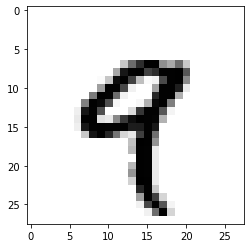

In [9]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [0]:
from tensorflow.keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))


In [0]:

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [0]:

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [0]:

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2537 - accuracy: 0.9265
Epoch 2/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1008 - accuracy: 0.9707
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0676 - accuracy: 0.9796
Epoch 4/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0494 - accuracy: 0.9847
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0365 - accuracy: 0.9889


In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.0722 - accuracy: 0.9781


In [16]:
print('test_acc:', test_acc)

test_acc: 0.9781
